#  Занятие 11
# Временные ряды

Понятие временного ряда. Свойства временного ряда (стационарность, сезональность, тренд). Понятие волатильности временного ряда. Авторегрессионные модели (MA, AR, ARMA, ARIMA, SARIMA). Модели для волатильных временных рядов ARCH и GARCH. Случайный лес и бустинги. Кросс-валидация для временных рядов.


**Временно́й ряд (динамический ряд, ряд динамики)** — собранный в разные моменты времени статистический материал о значении каких-либо параметров (в простейшем случае одного) исследуемого процесса. Каждая единица статистического материала называется измерением или отсчётом.
Можно дать и более простое определение временного ряда.
Временной ряд - это последовательность наблюдений за определенным параметром в разные моменты времени.

Во временном ряде для каждого измерения должно быть указано время измерения или номер измерения по порядку. Временной ряд существенно отличается от простой выборки данных, так как при анализе учитывается взаимосвязь измерений со временем, а не только статистическое разнообразие и статистические характеристики выборки.

### Свойства временного ряда

К основным свойствам временных рядов относятся: стационарность, сезонность и тренд.

**Стационарность** - это свойство временного ряда, которое означает, что его средние и стандартные отклонения не меняются со временем. Если временной ряд является стационарным, то его можно легко анализировать и прогнозировать. Нестационарный временной ряд может иметь тренд (постоянный рост или падение), цикличность (повторение циклов) или сезонность (повторение определенных событий в разное время года).

**Тренд** представляет собой общую систематическую линейную или нелинейную компоненту, которая может изменяться во времени.

**Сезонная составляющая** — это периодически повторяющаяся компонента. Оба эти вида регулярных компонент часто присутствуют в ряде одновременно.

**Шум** - случайное изменение в ряду, не коррелирующее с другими данными.

Существует несколько методов для проверки ряда на стационарность. Можно построить график данных и обратить внимание на следующие аспекты:

* Среднее значение: колебания этого показателя во времени могут сигнализировать о том, что временной ряд не стационарен.

* Дисперсия: если дисперсия меняется со временем, это также свидетельствует о нестационарности ряда.

* Тренд: если на графике есть видимый тренд, это еще одно уведомление о нестационарности.

* Сезонность: если на графике присутствуют сезонные колебания, это может указывать на нестационарность.

Но более точным будет проведение статистического анализа, например, с помощью **теста Дики-Фуллера**. Этот метод представляет количественную оценку стационарности временного ряда. Основная гипотеза теста предполагает, что ряд динамики не стационарен. Если значение p меньше уровня значимости 0.05 в результате теста, то основная гипотеза отвергается, и ряд может считаться **стационарным**.

Для анализа временных рядов часто проводят декомпозицию временного ряда.

**Декомпозиция** – процедура разложения временного ряда на три временных компоненты:

* Тренд $T_t$: плавное долгосрочное изменение временного ряда.

* Сезонность $S_t$: циклические изменения временного ряда с постоянным периодом сезонности.

* Ошибка $R_t$: непрогнозируемая случайная компонента ряда.

Можно рассматривать аддитивную декомпозицию, в которой ряд представляется в виде $y_t = T_t + S_t + R_t$ или же мультипликативную при которой ряд представляется как $y_t = T_t \cdot S_t \cdot R_t$. Можно заметить, что для построения мультипликативного разложения достаточно выполнить аддитивную декомпозицию для ряда $log y_t$.


In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


### Аддитивное разложение

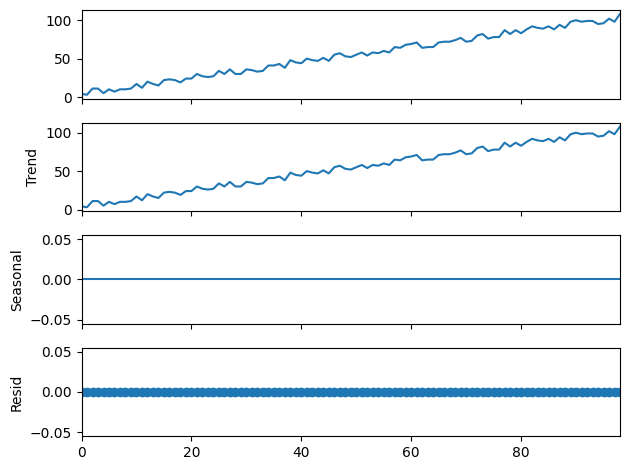

In [2]:
timeseries = pd.Series([i + random.randrange(10) for i in range(1,100)])
result = seasonal_decompose(timeseries, model='additive', period=1)
result.plot()
plt.show()

### Мультипликативное разложение

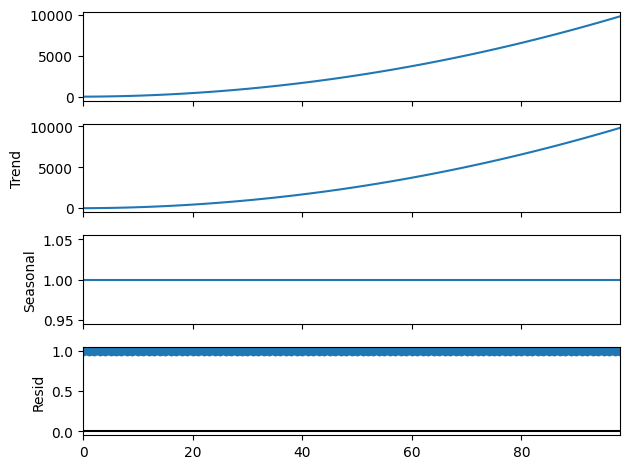

In [3]:
timeseries = pd.Series([i**2.0 for i in range(1,100)])
result = seasonal_decompose(timeseries, model='multiplicative', period=1)
result.plot()
plt.show()

## Модели временных рядов

### Наивное предсказание

Предсказания для каждого горизонта соотвествуют последнему наблюдаемому значению:
    
$Y(t+h)=Y(t)$

где $Y(t+h)$ - предсказание модели на горизонте $h$.

### Регрессионные модели прогнозирования

Регрессионные модели прогнозирования одни из старейших, однако нельзя сказать, что она нынче очень популярны.

Регрессионными моделями являются:

* Простая линейная регрессия (linear regression)
* Множественная регрессия (multilple regression)
* Нелинейная регрессия (nonlinear regression)

### Авторегрессионные модели прогнозирования

Это широчайший и один из двух наиболее широко применимых классов моделей.

**ARIMAX (autoregression integrated moving average extended)**

** GARCH (generalized autoregressive conditional heteroskedasticity)**

**Авторегрессионная (AR-) модель (англ. autoregressive model)** — модель временных рядов, в которой значения временного ряда в данный момент линейно зависят от предыдущих значений этого же ряда. Авторегрессионный процесс порядка p (AR(p)-процесс) определяется следующим образом:

$Y_t = c + \sum_{i=1}^p a_i Y_{t-i} + \varepsilon_t$

где $a_1, a_2, ..., a_p$ -  параметры модели (коэффициенты авторегрессии), $c$ - постоянная (часто для упрощения предполагается равной нулю), а $\varepsilon_t$ — белый шум.

**Модель скользящего среднего q-го порядка (MA(q))** — модель временного ряда вида:

$X_{t}=\sum _{j=0}^{q}b_{j}\varepsilon _{t-j}$

где $\varepsilon_{t}$ — белый шум, $b_{j}$ — параметры модели ($b_{0}$ можно считать равным 1 без ограничения общности).

Также в модель иногда добавляют константу. Тем не менее, поскольку чаще всего модели скользящего среднего используются для моделирования случайных ошибок временных рядов, то константу можно считать параметром основной модели.

Процесс белого шума формально можно считать процессом скользящего среднего нулевого порядка — MA(0).

Чаще всего на практике используют процесс скользящего среднего первого порядка MA(1):

$\displaystyle X_{t}=\varepsilon _{t}+b\varepsilon _{t-1}$

Согласно теореме Волда всякий «регулярный» стационарный процесс может быть представлен как некоторый процесс
$\displaystyle MA(\infty )$ -процесс с некоторыми коэффициентами (сумма их модулей должна быть конечной).

В частности отсюда следует, что любой «регулярный» стационарный процесс можно сколь угодно точно приблизить некоторым MA(q)-процессом конечного порядка. Тем не менее такой способ иногда потребовал бы очень большого порядка модели. Сократить количество параметров модели позволяют модели ARMA, которые дополняют MA-модели авторегрессионной частью.

**Модель авторегрессии — скользящего среднего (англ. autoregressive moving-average model, ARMA)** — одна из математических моделей, использующихся для анализа и прогнозирования стационарных временных рядов в статистике. Модель ARMA обобщает две более простые модели временных рядов — модель авторегрессии (AR) и модель скользящего среднего (MA).

Моделью ARMA(p, q), где p и q — целые числа, задающие порядок модели, называется следующий процесс генерации временного ряда $\{ X_t \}$:

$ X_t = c + \varepsilon_t +  \sum_{i=1}^p \alpha_i X_{t-i} + \sum_{i=0}^q \beta_i \varepsilon_{t-i}$

где $c$ — константа, $\varepsilon_t$ — белый шум, то есть последовательность независимых и одинаково распределённых случайных величин (как правило, нормальных), с нулевым средним, а $\alpha_1, \ldots, \alpha_p$ и $\beta_1, \ldots, \beta_q$ — действительные числа, авторегрессионные коэффициенты и коэффициенты скользящего среднего, соответственно.

Такая модель может интерпретироваться как линейная модель множественной регрессии, в которой в качестве объясняющих переменных выступают прошлые значения самой зависимой переменной, а в качестве регрессионного остатка — скользящие средние из элементов белого шума. ARMA-процессы имеют более сложную структуру по сравнению со схожими по поведению AR- или MA-процессами в чистом виде, но при этом ARMA-процессы характеризуются меньшим количеством параметров, что является одним из их преимуществ.

При наличии единичных корней авторегрессионного полинома процесс является нестационарным. Корни меньше единицы на практике не рассматриваются, поскольку это процессы взрывного характера. Соответственно, для проверки стационарности временных рядов один из базовых тестов — тесты на единичные корни. Если тесты подтверждают наличие единичного корня, то анализируются разности исходного временного ряда и для стационарного процесса разностей некоторого порядка (обычно достаточно первого порядка, иногда второго) строится ARMA-модель.

Такие модели называются **ARIMA-моделями (интегрированный ARMA)** или **моделями Бокса-Дженкинса**. Модель ARIMA(p, d, q), где d-порядок интегрирования (порядок разностей исходного временного ряда), p и q — порядок AR и MA — частей ARMA-процесса разностей d-го порядка, можно записать в следующей операторной форме:
$\displaystyle \alpha (L)\vartriangle ^{d}X_{t}=c+\beta (L)\varepsilon _{t}, \vartriangle =1-L$

Процесс ARIMA(p, d, q) эквивалентен процессу ARMA(p+d, q) с d единичными корнями.

Для построения модели ARMA по серии наблюдений необходимо определить порядок модели (числа p и q), а затем и сами коэффициенты. Для определения порядка модели может применяться исследование таких характеристик временного ряда, как его автокорреляционная функция и частная автокорреляционная функция. Для определения коэффициентов применяются такие методы, как метод наименьших квадратов и метод максимального правдоподобия.

**ARIMA (AutoRegressive Integrated Moving Average)**, **Авторегрессионное интегрированное скользящее среднее** — это статистическая модель, которая используется для анализа и прогнозирования данных динамических рядов.

* Авторегрессионная (AR) часть относится к использованию зависимости между текущим наблюдением и определенным количеством предыдущих наблюдений. Например, чтобы предсказать погоду на завтра, мы смотрим погоду в предыдущие дни.

* Интегрированная (I) часть обозначает, что данные временного ряда преобразуются с целью сделать ряд стационарным. Под стационарностью подразумевается такое свойство временного ряда, при котором его статистические характеристики не меняются во времени. Например, среднее и дисперсия остаются постоянными со временем. Обычно это достигается путем применения операции разности к ряду один или несколько раз.

* Скользящее среднее (MA) относится к моделированию ошибки между реальным наблюдением и прогнозируемым значением, используя комбинацию значений ошибок предыдущих шагов.

Реализация модели ARIMA: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html

In [4]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
time_series = pd.read_csv(url)

In [6]:
print(time_series.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [7]:
print(time_series.tail())

       Month  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432


In [8]:
print(time_series.isnull().sum())

Month         0
Passengers    0
dtype: int64


In [10]:
time_series['Passengers'] = time_series['Passengers'].fillna(time_series['Passengers'].mean())

Пример замены пропусков в определённом столбце:
    
time_series['Столбец 1'] = time_series['Столбец 1'].fillna(time_series['Столбец 1'].mean())

In [11]:
time_series['Month'] = pd.to_datetime(time_series['Month'])

In [12]:
time_series.set_index('Month', inplace=True)

Масштабирование данных

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
time_series[['Passengers']] = scaler.fit_transform(time_series[['Passengers']])

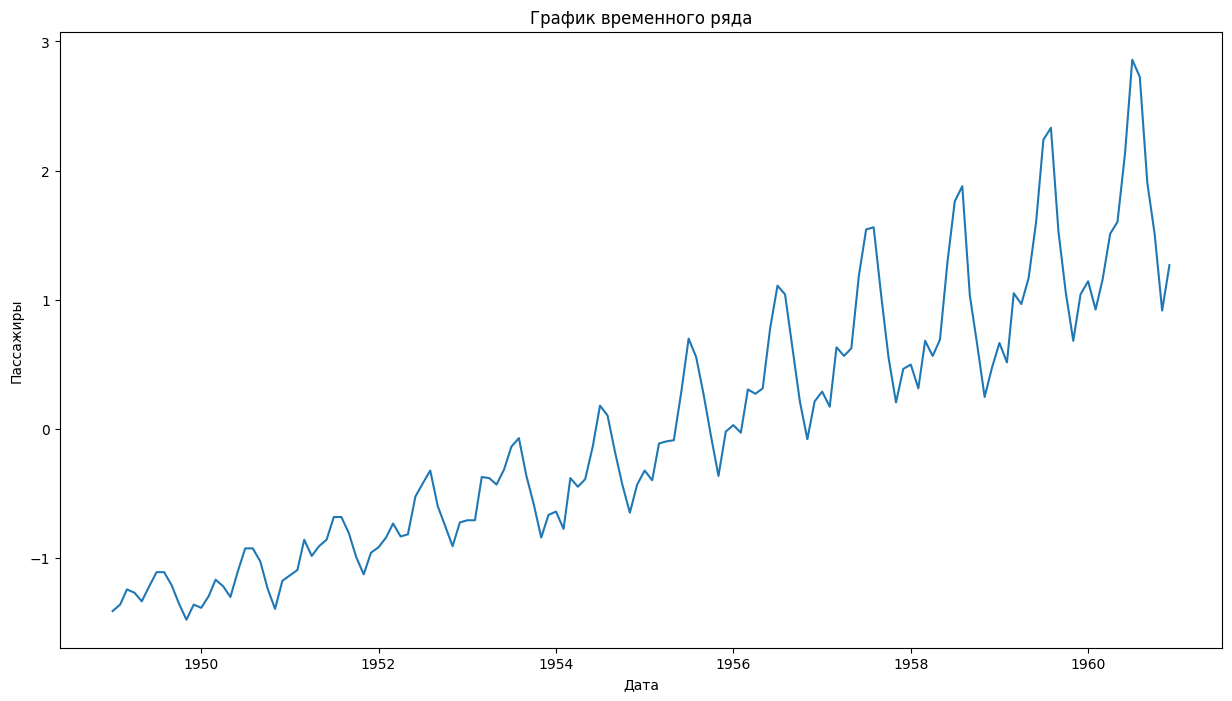

In [14]:
plt.figure(figsize=(15,8))
plt.plot(time_series['Passengers'])
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Пассажиры')
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

print('Результат теста:')
df_result = adfuller(time_series['Passengers'])
df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(df_result, df_labels):
    print(label + ' : ' + str(result_value))

if df_result[1] <= 0.05:
    print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
else:
    print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")

Результат теста:
ADF Test Statistic : 0.8153688792060514
p-value : 0.991880243437641
#Lags Used : 13
Number of Observations Used : 130
Слабые доказательства против нулевой гипотезы, ряд не является стационарным.


**Модель ARIMA** обычно обозначается как **ARIMA (p, d, q)**, где p, d и q — параметры модели:

1. p — порядок авторегрессии, который описывает количество предыдущих наблюдений, принимаемых во внимание в модели.

2. d — порядок интегрирования, который указывает, сколько раз нужно взять разность временного ряда для достижения стационарности.

3. q — порядок скользящего среднего, который связан с количеством предыдущих ошибок, используемых в модели.


**Сезонная модель ARIMA** обычно обозначается как **SARIMA (p, d, q) (P, D, Q) m**, где p, d, q — это несезонные параметры, а P, D, Q — сезонные:

1. p, d, q работают также, как и в ARIMA.

2. P — порядок сезонной авторегрессии, и он основан на количестве предыдущих сезонов, которые влияют на текущий сезон.

3. D — порядок сезонной интеграции, то есть сколько раз нужно продифференцировать данные, чтобы убрать сезонные тренды.

4. Q — порядок сезонного скользящего среднего, то есть как много предыдущих сезонных ошибок прогноза используется в модели.

5. m — это длина сезонного периода. Например, если данные имеют годовую сезонность и данные собираются ежемесячно, то m будет равно 12.

Как и ARIMA, SARIMA подходит для прогнозирования динамических рядов, но обладает дополнительной способностью улавливать и моделировать сезонные паттерны в данных.

Функция для определения параметров модели. Будем использовать только два возможных значения (0 и 1) для каждого из параметров, то есть всего 8 комбинаций для параметров ARIMA и 8 для сезонной части (при длине сезонного периода = 12). Таким образом, общее количество комбинаций, которые подлежат проверке, равно 64, что приведет к относительно быстрому выполнению.

In [16]:
def search_optimal_sarima(time_series, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]

    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = sm.tsa.statespace.SARIMAX(time_series,
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 12
search_optimal_sarima(time_series, seasonal_cycle_length)

ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-250.27346055973203


Для выбора оптимальной модел используется критерий информативности AIC (Akaike Information Criterion), который позволяет нам сравнить разные модели и определить, какая из них лучше. AIC помогает оценить, насколько модель соответствует данным, учитывая ее сложность. Итак, цель — найти модель с наименьшим значением AIC.

Описанный выше код проводит итерацию по всевозможным комбинациям параметров и применяет функцию SARIMAX для построения сезонной модели ARIMA. Параметр 'order' устанавливает основные параметры (p, d, q), а 'seasonal_order' задает сезонные параметры модели (P, D, Q, S).

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(time_series, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

In [18]:
results = model.fit()

In [19]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 120.504
Date:                            Fri, 26 Apr 2024   AIC                           -233.007
Time:                                    07:00:42   BIC                           -221.507
Sample:                                01-01-1949   HQIC                          -228.334
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3435      0.073     -4.690      0.000      -0.487      -0.200
ar.S.L12      -0.9330      0.210   

Вывод модели широко используется для оценки ее качества. Основные пункты, на которые следуют обратить внимание:

1. Коэффициенты: они должны быть статистически значимыми. Проверьте p-значения коэффициентов (P>|z|); они должны быть меньше 0.05.

2. Информационный критерий (AIC): меньшее значение AIC указывает на лучшую подгонку модели.

3. Ljung-Box (L1) (Q): это p-значение для Ljung-Box Q-статистики. Если значение больше 0.05, остатки случайны, что хорошо.

4. Jarque-Bera (JB): это тест на нормальность остатков. Если Prob(JB) больше 0.05, остатки нормальны, что хорошо.

5. Heteroskedasticity (H): это тест на гетероскедастичность остатков. Если Prob(H) (two-sided) больше 0.05, остатки гетероскедастичны, что хорошо. Гетероскедастичность — это ситуация, когда разброс ошибок ваших прогнозов меняется в зависимости от того, в какой точке вы находитесь. Более простыми словами, это когда у вас имеется неоднородность в ваших данных.

В идеале, модель должна иметь статистически значимые коэффициенты, небольшое значение AIC и нормально распределенные и не гетероскедастичные остатки. Соответствие этим критериям указывает на хорошую модель.

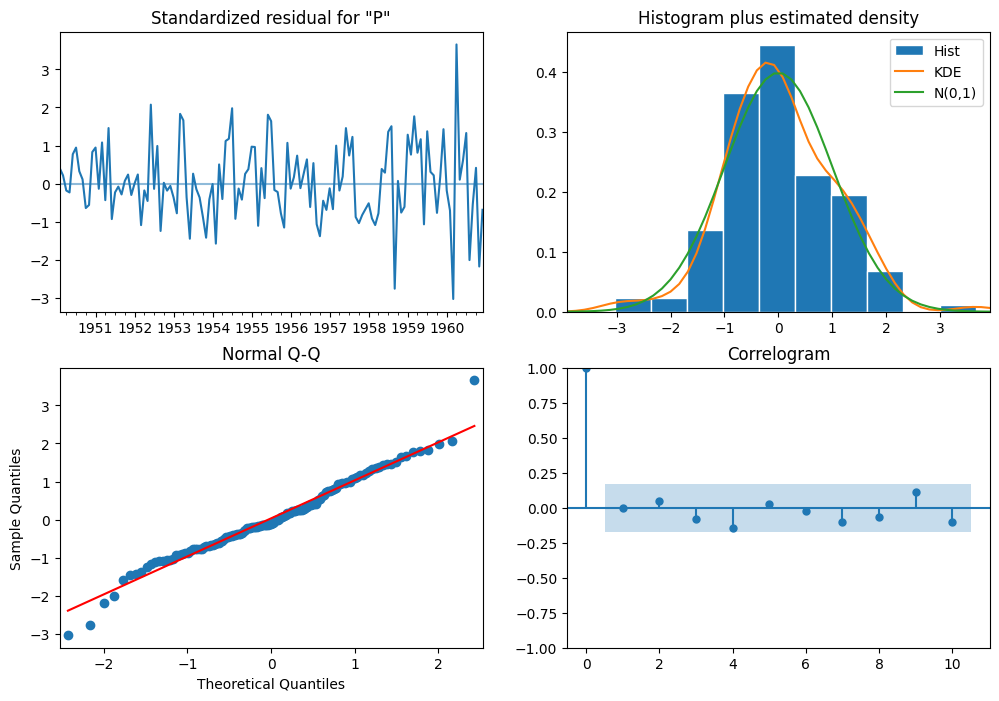

In [20]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

Кривая остатков — это график остатков модели по времени. Если модель хороша, остатки будут случайными, и график будет выглядеть как белый шум.

График нормального квантиля (Q-Q plot) — это график, который сравнивает распределение остатков с идеальным нормальным распределением. Если точки следуют диагональной линии, это означает, что остатки нормально распределены.

График коррелограммы — это график автокорреляции остатков. Если модель хороша, остатки не будут коррелировать друг с другом. Отсутствие голубых полосок за пределами голубого диапазона шума указывает на это.

Гистограмма остатков — это гистограмма распределения остатков. Если модель хороша, остатки должны быть нормально распределены, и эта гистограмма будет напоминать форму колокола.

Сгенерировав дополнительные признаки (календарные, статистические и лаг, т. е. значения отстоящие от текущего на заданное N число измерений) используя исходный временной ряд можно обучать случайный лес и бустинги.

### Кросс-валидация временного ряда

Стандартные схемы кросс-валидации нельзя применять для временных рядов потому что значения во временных рядах нельзя перемешивать. Существует два способа построить кросс-валидацию на временных рядах.

**Схема 1.**

1. Обучаемся на первых $t$ значениях временного ряда $y_1, y_2, ..., y_{t}$, прогнозируем следующие $\Delta t$ значений ряда $\hat{y_{t+1}}, \hat{y_{t+2}},..., \hat{y_{t+\Delta t}}$.

2. Обучаемся на $y_1, y_2, ..., y_{t}, y_{t+1}, y_{t+\Delta t}$, прогнозируем  $\hat{y_{t+\Delta+1}},..., \hat{y_{t+2\Delta t}}$.

...

3. Обучаемся на $y_1, ..., y_{t+(k-1)\Delta t}$, прогнозируем $\hat{y_{t+(k-1)\Delta+1}},..., \hat{y_{t+ k \Delta t}}$.

На каждой итерации считаем ошибки и усредняем.

![image.png](attachment:image.png)

**Схема 2.**

1. Обучаемся на первых $t$ значениях временного ряда $y_1, y_2, ..., y_{t}$, прогнозируем следующие $\Delta t$ значений ряда $\hat{y_{t+1}}, \hat{y_{t+2}},..., \hat{y_{t+\Delta t}}$.

2. Обучаемся на $y_{1+\Delta t}, ..., y_{t+\Delta t}$, прогнозируем  $\hat{y_{t+\Delta+1}},..., \hat{y_{t+2\Delta t}}$.

...

3. Обучаемся на $y_{1+(k-1)\Delta t}, ..., y_{t+(k-1)\Delta t}$, прогнозируем $\hat{y_{t+(k-1)\Delta+1}},..., \hat{y_{t+ k \Delta t}}$.

На каждой итерации считаем ошибки и усредняем.

![image.png](attachment:image.png)

## Практические задания

1. Постройте модель ARIMA для прогнозирования температуры из датасета https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption

In [88]:
df = pd.read_csv('powerconsumption.csv')

In [89]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [32]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [34]:
print(df.isnull().sum())

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.6 MB


In [113]:
print(int(df['Datetime'].values[60][4]))

2


In [35]:
for column in df:
  if (column != 'Datetime'):
    df[column] = df[column].fillna(df[column].mean())

In [36]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [37]:
df.set_index('Datetime', inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Temperature']] = scaler.fit_transform(df[['Temperature']])

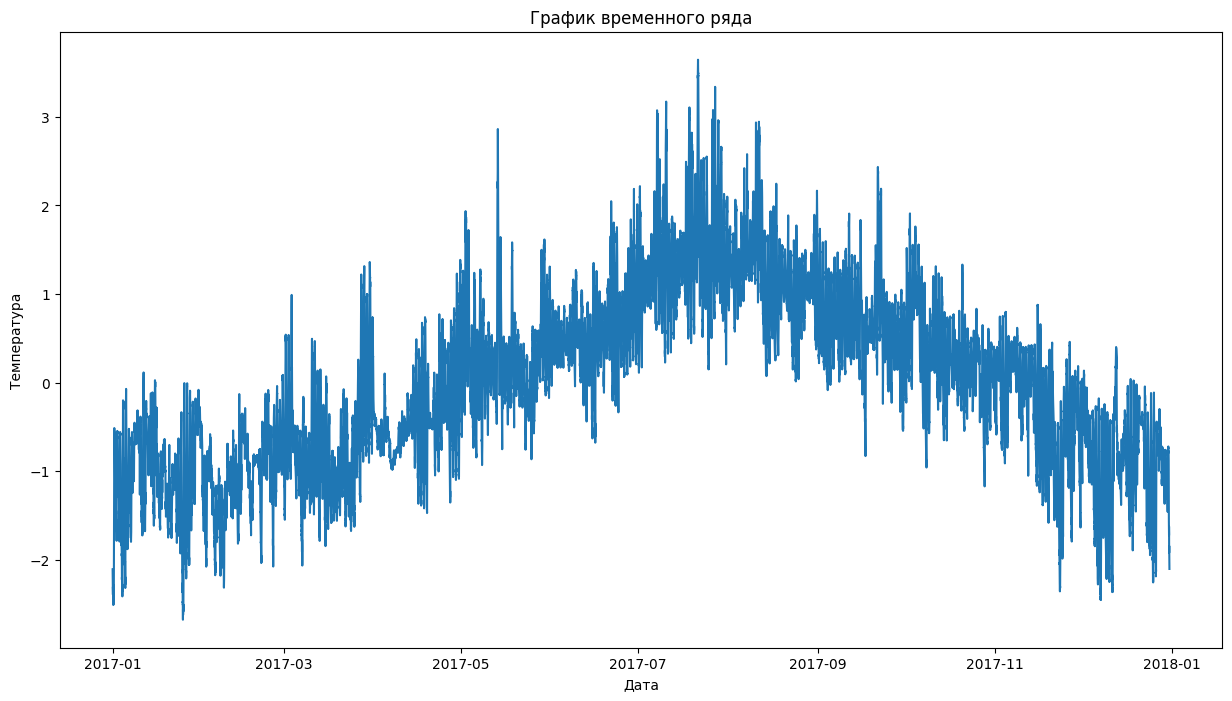

In [39]:
plt.figure(figsize=(15,8))
plt.plot(df['Temperature'])
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

print('Результат теста:')
df_result = adfuller(df['Temperature'])
df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(df_result, df_labels):
    print(label + ' : ' + str(result_value))

if df_result[1] <= 0.05:
    print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
else:
    print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")

Результат теста:
ADF Test Statistic : -9.459827585705334
p-value : 4.3841857278151857e-16
#Lags Used : 58
Number of Observations Used : 52357
Сильные доказательства против нулевой гипотезы, ряд является стационарным.


In [41]:
def search_optimal_sarima(time_series, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]

    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = sm.tsa.statespace.SARIMAX(time_series,
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 12
search_optimal_sarima(df, seasonal_cycle_length)

ARIMANonexNone - AIC:inf


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(time_series)

In [43]:
results = model.fit()

In [44]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -22.234
Date:                Fri, 26 Apr 2024   AIC                             48.467
Time:                        07:51:44   BIC                             54.407
Sample:                    01-01-1949   HQIC                            50.881
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9646      0.017     56.121      0.000       0.931       0.998
sigma2         0.0783      0.009      9.196      0.000       0.062       0.095
Ljung-Box (L1) (Q):                  13.91   Jarque-

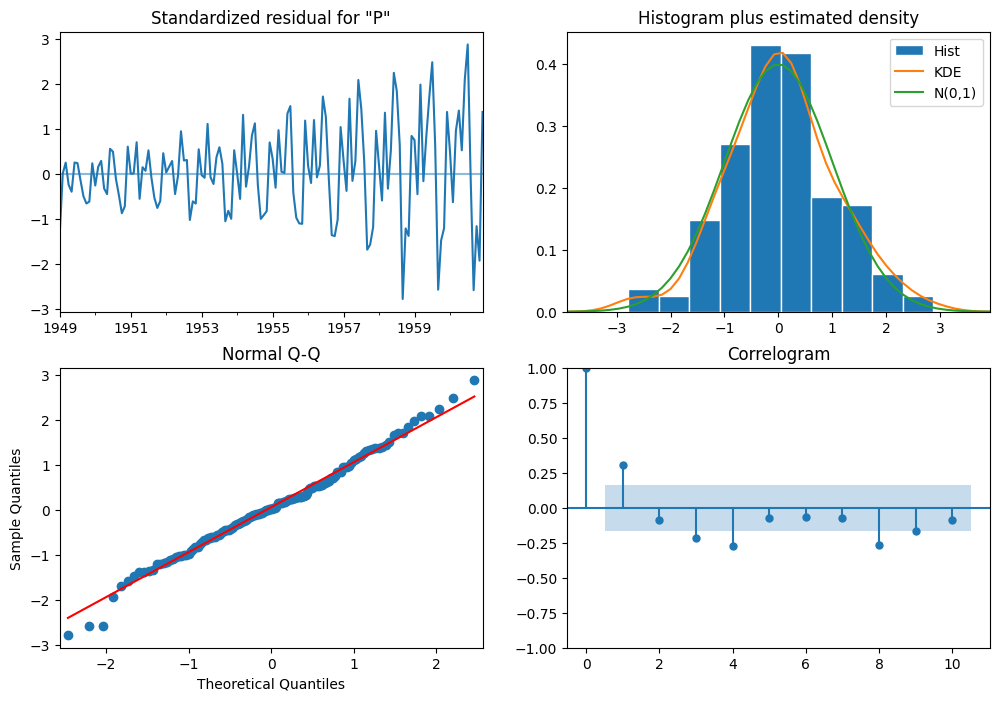

In [45]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

2. Реализуйте две описанные выше схемы кросс-валидации для временных рядов.

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")


temp_data = df['Temperature'].values


delta_t = 30


tscv1 = TimeSeriesSplit(n_splits=len(temp_data)//delta_t)


tscv2 = TimeSeriesSplit(n_splits=len(temp_data)//delta_t)


predictions = []
actual_values = []


for train_index, test_index in tscv1.split(temp_data):
    X_train, X_test = temp_data[:test_index[0]], temp_data[test_index[0]:test_index[-1]+1]
    y_train = np.arange(len(X_train), len(X_train) + len(X_test))


    model = LinearRegression()
    model.fit(np.arange(len(X_train)).reshape(-1, 1), X_train)


    y_pred = model.predict(np.arange(len(X_train), len(X_train) + len(X_test)).reshape(-1, 1))

    predictions.extend(y_pred)
    actual_values.extend(y_train)


In [64]:

for train_index, test_index in tscv2.split(temp_data):
    X_train, X_test = temp_data[:test_index[0]], temp_data[test_index[0]:test_index[-1]+1]
    y_train = np.arange(len(X_train), len(X_train) + len(X_test))


    model = LinearRegression()
    model.fit(np.arange(len(X_train)).reshape(-1, 1), X_train)


    y_pred = model.predict(np.arange(len(X_train), len(X_train) + len(X_test)).reshape(-1, 1))

    predictions.extend(y_pred)
    actual_values.extend(y_train)


3. Используя данные из п. 1. создайте дополнительные признаки и обучите случайный лес и бустинги (XGBoost, LightGBM и Catboost) для прогнозирования температуры на 30 дней вперёд. Оцените качество построенной модели по метрикам: MAE, MSE, SMAPE.

In [66]:
def print_memory_usage_of_df(df):
    bytes_per_mb = 0.000001
    memory_usage = round(df.memory_usage().sum() * bytes_per_mb, 3)
    print('Memory usage is ', str(memory_usage) + " MB")

print_memory_usage_of_df(df)
print(df.shape)

Memory usage is  3.774 MB
(52416, 8)


In [67]:
dummy_encoded_train_df = pd.get_dummies(df)
dummy_encoded_train_df.shape

(52416, 8)

In [68]:
print_memory_usage_of_df(dummy_encoded_train_df)

Memory usage is  3.774 MB


In [70]:
dummy_encoded_sparse_train_df = pd.get_dummies(df, sparse=True)
dummy_encoded_sparse_train_df.shape

(52416, 8)

In [71]:
print_memory_usage_of_df(dummy_encoded_sparse_train_df)

Memory usage is  3.774 MB


In [72]:
def convert_df_to_sparse_array(df, exclude_columns=[]):
    df = df.copy()
    exclude_columns = set(exclude_columns)

    for (column_name, column_data) in df.iteritems():
        if column_name in exclude_columns:
            continue
        df[column_name] = pd.SparseArray(column_data.values, dtype='uint8')

    return df

In [100]:
X_train = df[int(df['Datetime'].values[0][4]) % 2 == 0].drop(['Temperature'], axis=1)

y_train = np.log1p(df['Temperature'].values)

X_test_original = df[int(df['Datetime'].values[0][4]) % 2 == 1].drop(['Temperature'], axis=1)

X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

KeyError: False